In [64]:
import CliffWalking
import importlib
importlib.reload(CliffWalking)
import numpy as np
import time, sys
import matplotlib.pyplot as plt

In [65]:
alpha_array = np.arange(0.1, 1.05, 0.05)

asymptotics = {}
asymptotics['sarsa'] = np.zeros(alpha_array.shape)
asymptotics['expected-sarsa'] = np.zeros(alpha_array.shape)
asymptotics['q-learning'] = np.zeros(alpha_array.shape)
transient = {}
transient['sarsa'] = np.zeros(alpha_array.shape)
transient['expected-sarsa'] = np.zeros(alpha_array.shape)
transient['q-learning'] = np.zeros(alpha_array.shape)

In [66]:
cliff_walk = CliffWalking.CliffWalk()
learner = CliffWalking.Learner(world=cliff_walk, greedy_epsilon=0.1, alpha=0.5, gamma=1)

num_episode = 10000
for algorithm in ['sarsa', 'q-learning', 'expected-sarsa']:
    learner.set_algorithm(algorithm)
    for alpha_index, alpha in enumerate(alpha_array):
        learner.set_alpha(alpha)
        learner.reset()
        average_reward = 0
        for episode_id in range(num_episode):
            if episode_id < 0.25*num_episode:
                learner.run_single_episode()
            else:
                average_reward = average_reward + learner.run_single_episode()
                
        asymptotics[algorithm][alpha_index] = average_reward/(0.75*float(num_episode))
        # display progress
        sys.stdout.write("\r"+algorithm+' '+str(alpha))
        sys.stdout.flush()

expected-sarsa 1.05

In [67]:
num_episode = 100
num_instances = 10
for algorithm in ['sarsa', 'q-learning', 'expected-sarsa']:
    learner.set_algorithm(algorithm)
    for alpha_index, alpha in enumerate(alpha_array):
        learner.set_alpha(alpha)
        average_reward = 0
        for instance_id in range(num_instances):
            learner.reset()
            for _ in range(num_episode):
                average_reward = average_reward + learner.run_single_episode()
                # display progress
                sys.stdout.write("\r"+algorithm+' '+str(alpha)+' '+str(instance_id))
                sys.stdout.flush()
        transient[algorithm][alpha_index] = average_reward/float(num_instances*num_episode)

expected-sarsa 1.0 99

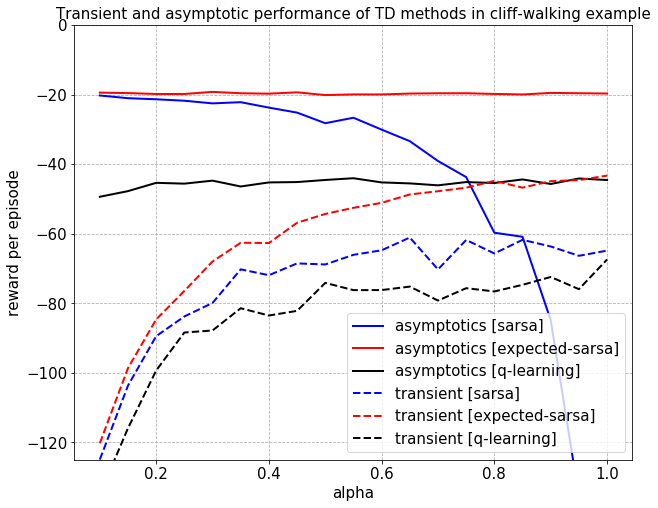

In [68]:
fig, ax = plt.subplots(figsize=(10,8))
fontsize = 15

ax.plot(alpha_array, asymptotics['sarsa'], linewidth=2, linestyle='-', color='b', label='asymptotics [sarsa]')
ax.plot(alpha_array, asymptotics['expected-sarsa'], linewidth=2, linestyle='-', color='r', label='asymptotics [expected-sarsa]')
ax.plot(alpha_array, asymptotics['q-learning'], linewidth=2, linestyle='-', color='k', label='asymptotics [q-learning]')

ax.plot(alpha_array, transient['sarsa'], linewidth=2, linestyle='--', color='b', label='transient [sarsa]')
ax.plot(alpha_array, transient['expected-sarsa'], linewidth=2, linestyle='--', color='r', label='transient [expected-sarsa]')
ax.plot(alpha_array, transient['q-learning'], linewidth=2, linestyle='--', color='k', label='transient [q-learning]')

ax.grid(linestyle='--')
ax.legend(loc='best', fontsize=fontsize)
ax.set_xlabel('alpha', fontsize=fontsize)
ax.set_ylabel('reward per episode', fontsize=fontsize)
ax.set_title('Transient and asymptotic performance of TD methods in cliff-walking example', fontsize=fontsize)
ax.set_ylim([-125,0])
ax.tick_params(labelsize=fontsize)
plt.show()